In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("star-history-2025117.csv")
df

,Repository,Date,Stars
0,basf/mlipx,Thu Jan 01 1970 01:00:00 GMT+0100 (Central Eur...,1
1,basf/mlipx,Fri Jan 02 1970 02:51:49 GMT+0100 (Central Eur...,5
2,basf/mlipx,Mon Jan 05 1970 03:14:35 GMT+0100 (Central Eur...,9
3,basf/mlipx,Mon Jan 05 1970 03:50:04 GMT+0100 (Central Eur...,13
4,basf/mlipx,Mon Jan 05 1970 06:53:49 GMT+0100 (Central Eur...,17
...,...,...,...
111,apax-hub/apax,Mon Nov 22 1971 10:39:35 GMT+0100 (Central Eur...,16
112,apax-hub/apax,Wed Nov 24 1971 10:19:45 GMT+0100 (Central Eur...,17
113,apax-hub/apax,Sat Dec 04 1971 01:50:36 GMT+0100 (Central Eur...,18
114,apax-hub/apax,Sat Jan 22 1972 14:03:12 GMT+0100 (Central Eur...,19


In [4]:
mlipx = df[df['Repository'] == "basf/mlipx"]
zndraw = df[df['Repository'] == "zincware/zndraw"]
ipsuite = df[df['Repository'] == "zincware/ipsuite"]
mdsuite = df[df['Repository'] == "zincware/mdsuite"]
zntrack = df[df['Repository'] == "zincware/zntrack"]
apax = df[df['Repository'] == "apax-hub/apax"]

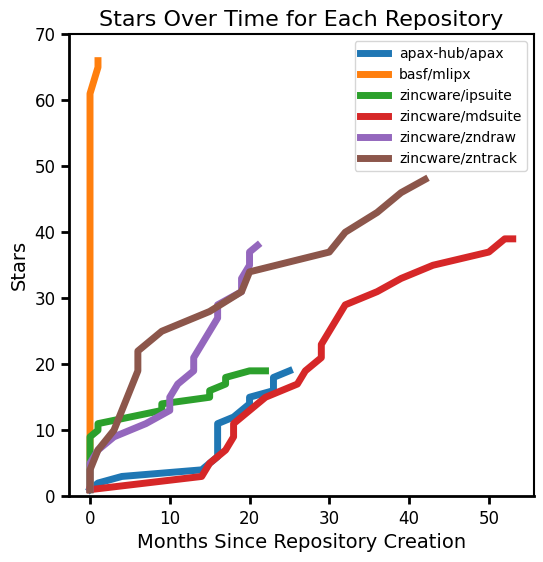

In [28]:
from datetime import datetime

# Sample DataFrame (Replace with your actual data)
# df should contain 'repo', 'date', and 'stars' columns
def parse_custom_datetime(date_str):
    # Extract only the relevant part (before "GMT")
    date_part = str(date_str).split(' GMT')[0]
    # Convert to datetime
    return datetime.strptime(date_part, "%Y-%m-%d %H:%M:%S")

# Apply parsing function
df['Date'] = df['Date'].apply(parse_custom_datetime)

# Convert dates to number of months since repository creation
df['months_since_creation'] = (df['Date'] - df.groupby('Repository')['Date'].transform('min')).dt.days // 30

# Sort values properly to avoid crossing lines
df = df.sort_values(by=['Repository', 'months_since_creation'])

# Plot
plt.figure(figsize=(6, 6))
for repo, data in df.groupby('Repository'):
    plt.plot(data['months_since_creation'], data['Stars'], linestyle='-', lw=5, label=repo)

plt.xlabel('Months Since Repository Creation',fontsize=14)
plt.ylabel('Stars',fontsize=14)
plt.title('Stars Over Time for Each Repository',fontsize=16)
plt.legend(loc="best")
plt.ylim([0,70])

plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.tick_params(axis='x', width=2, length=6)  # Width: thickness, Length: tick length
plt.tick_params(axis='y', width=2, length=6)

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# plt.show()


plt.savefig("stars.png", dpi=300)